In [ ]:
from google.colab import files
uploaded = files.upload()

Saving loan_borrower_data.csv to loan_borrower_data.csv


# Case Study – Banking & Loans in Ghana
### Focus: Reducing Non-Performing Loans (NPLs)

Welcome to the assignment on reducing Non-Performing Loans (NPLs) at GhanaLoanConnect. In this project, you will build a supervised learning model to predict whether a borrower is likely to default on a loan. Use this notebook as a guide to complete your work.

## Business Challenge

GhanaLoanConnect is a peer-to-peer lending platform that connects borrowers with lenders. Your task is to develop a machine learning model that predicts loan default. The main objectives are:

- **Minimize the risk of non-performing loans (NPLs).**
- **Enable informed decision-making in the loan approval process.**

## Dataset Overview

The dataset `loan_borrower_data.csv` contains approximately 9,578 records with the following key attributes:

- **credit.policy:** 1 if the borrower meets the credit approval standards, 0 otherwise.
- **purpose:** The intended use of the loan (e.g., `credit_card`, `debt_consolidation`, etc.).
- **int.rate:** The interest rate of the loan (e.g., 0.11 for 11%).
- **installment:** The monthly repayment amount.
- **log.annual.inc:** The natural logarithm of the borrower’s annual income.

Make sure to load this dataset into your notebook.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, roc_auc_score, confusion_matrix,
                             classification_report)

# Load the dataset
data = pd.read_csv('loan_borrower_data.csv')
print(data.head())

   credit.policy             purpose  int.rate  installment  log.annual.inc  \
0              1  debt_consolidation    0.1189       829.10       11.350407   
1              1         credit_card    0.1071       228.22       11.082143   
2              1  debt_consolidation    0.1357       366.86       10.373491   
3              1  debt_consolidation    0.1008       162.34       11.350407   
4              1         credit_card    0.1426       102.92       11.299732   

     dti  fico  days.with.cr.line  revol.bal  revol.util  inq.last.6mths  \
0  19.48   737        5639.958333      28854        52.1               0   
1  14.29   707        2760.000000      33623        76.7               0   
2  11.63   682        4710.000000       3511        25.6               1   
3   8.10   712        2699.958333      33667        73.2               1   
4  14.97   667        4066.000000       4740        39.5               0   

   delinq.2yrs  pub.rec  not.fully.paid  
0            0        0   

## 1. Data Exploration

Explore the dataset by checking its structure, missing values, and basic statistics. Answer the following questions:

- What are the data types of each column?
- Are there any missing or anomalous values?
- What is the distribution of the target variable?


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB
None
       credit.policy     int.rate  installment  log.annual

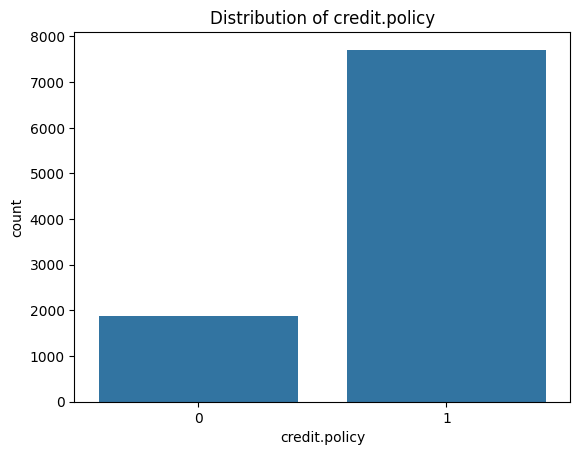

In [ ]:
# TODO: Perform data exploration
print(data.info())
print(data.describe())

# Check for missing values
print(data.isnull().sum())

# Visualize the distribution of the target variable (credit.policy)
sns.countplot(x='credit.policy', data=data)
plt.title('Distribution of credit.policy')
plt.show()

## 2. Data Preprocessing

Prepare the data for modeling:

- Handle missing values if there are any.
- Convert categorical variables (e.g., `purpose`) to numerical values using techniques like one-hot encoding.
- Scale or transform features if needed.

In [ ]:
# TODO: Preprocess the data
## Example: One-hot encoding for the 'purpose' column
data = pd.get_dummies(data, columns=['purpose'], drop_first=True)

# Verify the changes
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

## 3. Feature Engineering

Enhance the dataset by creating or transforming features that could help improve model performance. Consider:

- Interactions between features
- Derived features based on domain knowledge
- Any other transformation that might help the model

Document your feature engineering steps and rationale.

In [ ]:
# TODO: Perform feature engineering

# Example: Create a new feature (if applicable)
 #data['new_feature'] = data['installment'] / data['log.annual.inc']
data['not_fully_paid'] = (data['days.with.cr.line'] > 5000).astype(int)


# Check the new features
print(data.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

## 4. Model Selection and Training

Split the data into training and testing sets, and train your model(s). Consider using multiple models such as Logistic Regression, Random Forest, or other suitable algorithms. Use cross-validation to assess model robustness.

In [ ]:
# Split the data into features and target
X = data.drop('credit.policy', axis=1)
y = data['credit.policy']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# TODO: Train your models
## Example with Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Evaluate the model on the testing set
y_pred = logreg.predict(X_test)
print('Accuracy:', accuracy_score(y_test, y_pred))
print('Precision:', precision_score(y_test, y_pred))
print('Recall:', recall_score(y_test, y_pred))
print('F1 Score:', f1_score(y_test, y_pred))

# TODO: Try additional models (e.g., Random Forest, Gradient Boosting) and compare performance


Accuracy: 0.8987473903966597
Precision: 0.9064632677639503
Recall: 0.9749568221070811
F1 Score: 0.9394632827127106


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

# TODO: Try additional models (e.g., Random Forest, Gradient Boosting) and compare performance

## Add Gradient Boosting Model
gb = GradientBoostingClassifier(random_state=42)
gb.fit(X_train, y_train)

# Evaluate the Gradient Boosting model on the testing set
y_pred_gb = gb.predict(X_test)

print('Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred_gb))
print('Gradient Boosting Precision:', precision_score(y_test, y_pred_gb))
print('Gradient Boosting Recall:', recall_score(y_test, y_pred_gb))
print('Gradient Boosting F1 Score:', f1_score(y_test, y_pred_gb))
print('Gradient Boosting ROC AUC:', roc_auc_score(y_test, gb.predict_proba(X_test)[:, 1]))

Gradient Boosting Accuracy: 0.9895615866388309
Gradient Boosting Precision: 0.9901372212692967
Gradient Boosting Recall: 0.9969775474956822
Gradient Boosting F1 Score: 0.9935456110154905
Gradient Boosting ROC AUC: 0.995736376523607


## 5. Model Evaluation and Testing

Assess your model using various metrics such as:

- Accuracy
- Precision
- Recall
- F1 Score
- ROC-AUC

Plot confusion matrices and ROC curves as needed.

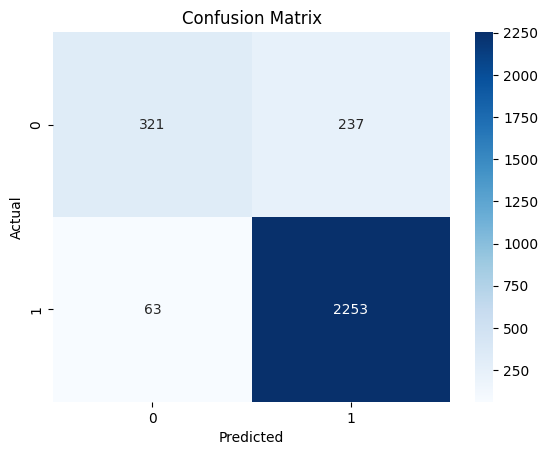

              precision    recall  f1-score   support

           0       0.84      0.58      0.68       558
           1       0.90      0.97      0.94      2316

    accuracy                           0.90      2874
   macro avg       0.87      0.77      0.81      2874
weighted avg       0.89      0.90      0.89      2874



In [ ]:
# TODO: Evaluate your model further
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print(classification_report(y_test, y_pred))

## 6. Model Interpretation and Insights

Discuss the following:

- Which features are most important in predicting loan default?
- What business insights can be drawn from your model?

Provide clear interpretations and, if possible, visualize feature importance.

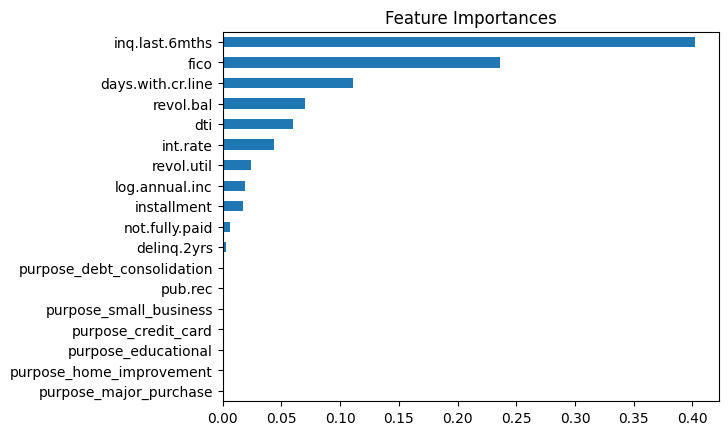

In [ ]:
# TODO: Interpret model results

# Example for a tree-based model (if used):
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)
feature_importances = pd.Series(model.feature_importances_, index=X_train.columns)
feature_importances.sort_values().plot(kind='barh')
plt.title('Feature Importances')
plt.show()

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score
# Import SMOTE for oversampling
from imblearn.over_sampling import SMOTE

# Set up the model and hyperparameters
rf = RandomForestClassifier(random_state=42)
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [4, 6, 8],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

# Run GridSearch on original training data

def run_gridsearch(X_train, y_train, param_grid):
    rf = RandomForestClassifier(random_state=42)
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                               scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)
    return grid_search

    # For original training data
grid_original = run_gridsearch(X_train, y_train, param_grid)

# For SMOTE-resampled training data

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)

grid_resampled = run_gridsearch(X_resampled, y_resampled, param_grid)

# Best models
best_rf_original = grid_original.best_estimator_
best_rf_resampled = grid_resampled.best_estimator_


# Fit GridSearch to resampled data
# NOTE: It is generally better to perform resampling within the cross-validation loop
# to avoid data leakage. However, to match the user's apparent intent of fitting
# after resampling, we will fit the GridSearchCV object on the resampled data here.
# For a more robust approach, consider using Pipeline with resampling and GridSearchCV.
grid_search_resampled = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='roc_auc', cv=3, verbose=1, n_jobs=-1)

grid_search_resampled.fit(X_resampled, y_resampled)

# Best model from resampling
best_rf = grid_search_resampled.best_estimator_

# Evaluate the best model from resampling
# Predict probabilities on the original, untouched test set
y_pred_proba_resampled = best_rf.predict_proba(X_test)[:, 1]
auc_score_resampled = roc_auc_score(y_test, y_pred_proba_resampled)
print("Best AUC Score after GridSearch on Resampled Data:", auc_score_resampled)
print(" Best Parameters after Resampling:", grid_search_resampled.best_params_)

# Optionally, evaluate the best model from the initial grid search on original data as well
best_rf_original = grid_original.best_estimator_
y_pred_proba_original = best_rf_original.predict_proba(X_test)[:, 1]
auc_score_original = roc_auc_score(y_test, y_pred_proba_original)
print("Best AUC Score after GridSearch on Original Data:", auc_score_original)
print(" Best Parameters on Original Data:", grid_original.best_params_)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best AUC Score after GridSearch on Resampled Data: 0.9864299156251354
 Best Parameters after Resampling: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
Best AUC Score after GridSearch on Original Data: 0.9914944193734099
 Best Parameters on Original Data: {'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


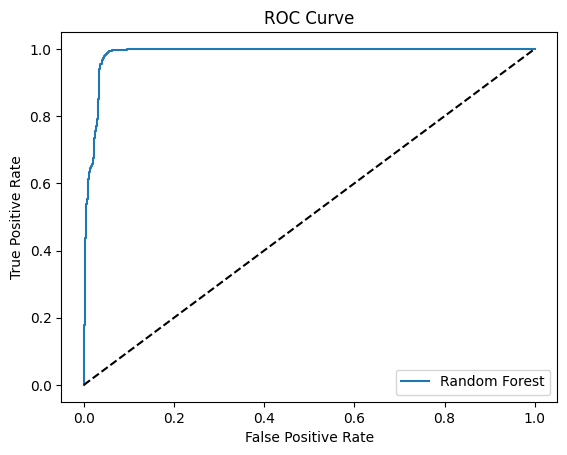

AUC Score:  0.9864299156251354


In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, roc_curve
import matplotlib.pyplot as plt

# Assuming 'best_rf' is the trained Random Forest model from the previous cell
# that you want to use for the ROC curve.
# If you want to use a different trained model, replace 'best_rf' with the correct variable name.
rf_probs = best_rf.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_probs)

plt.plot(fpr, tpr, label='Random Forest')
plt.plot([0,1],[0,1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

print("AUC Score: ", roc_auc_score(y_test, rf_probs))